In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime
#%matplotlib notebook


#adding dependencies for API pulls
import requests
from pprint import pprint
from config import access_key

In [3]:
# Reference files
stocks_10yr_df = pd.read_csv("Resources/stocks_10yr_df.csv")
stocks_2020_df = pd.read_csv("Resources/stocks_2020_df.csv")
reduced_data = pd.read_csv("Resources/reduced_data.csv")
month_data_df = pd.read_csv("Resources/month_data_df.csv")
countries_data = pd.read_csv("Resources/countries_data.csv")
currencyDF2020 = pd.read_csv("Resources/currencyDF2020.csv")
currencydf = pd.read_csv("Resources/currencydf.csv")
countries_deaths = pd.read_csv("Resources/countries_deaths.csv")

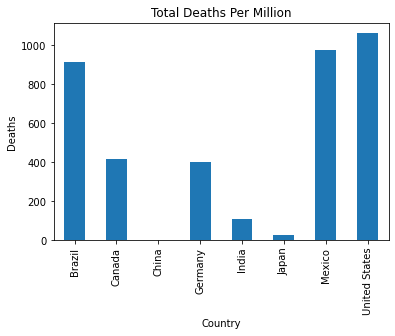

In [5]:
#find total deaths for each country
countries_deaths = countries_data.groupby(["location"])["total_deaths_per_million"].max()
countries_deaths.to_csv("Resources/countries_deaths.csv")

#bar chart of deaths for each country

bar_plot = countries_deaths.plot(kind = "bar")

#labels
plt.title("Total Deaths Per Million")
plt.xlabel("Country")
plt.ylabel("Deaths")

plt.show()

Text(0.5, 1.0, 'Deaths per Country by Month')

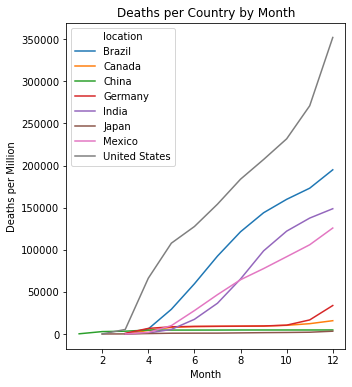

In [6]:
# plot data
fig, ax = plt.subplots(figsize=(5,6))
# use unstack()
reduced_data.groupby(["month","location"])["total_deaths"].last().unstack().plot(ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Deaths per Million")
ax.set_title("Deaths per Country by Month")

# Is there a correlation between covid deaths and stock market changes?

In [7]:
# Create a new data frame from the covid data 
country_data = countries_data.loc[:, ["location", "date", "new_cases", "new_deaths"]]

# Convert date field from an object to date/time
country_data['date']= pd.to_datetime(country_data['date'])

In [8]:
# Create a new data frame with all the dates of the year in it
# Need to create two lists (stocks and covid deaths) that are the same length to be able to plot
days2020 = pd.date_range(start='2020-01-01', end='2020-12-31')
days2020_df = pd.DataFrame(days2020, columns=['date'])
days2020_df.head()

,date
0,2020-01-01
1,2020-01-02
2,2020-01-03
3,2020-01-04
4,2020-01-05


In [9]:
# Clean up stocks data so it can merge with the date frame
stocks_date = stocks_2020_df.rename(columns={'Date':'date'})
stocks_date['date']= pd.to_datetime(stocks_date['date'])

In [10]:
# Merge the stocks and the data dataframe together so that there is a row for every day of 2020
stocks_2020_merged = stocks_date.merge(days2020_df, how='outer', on='date', sort=True)
stocks_2020_merged.head()

,date,Brazil Bovespa (%),Canada S&P TSX Composite (%),China Shanghai Composite (%),Germany DAX (%),India BSE Sensex 30 (%),Japan Nikkei 225 (%),Mexico S&P BMV IPC (%),USA Down Jones (%)
0,2020-01-01,NaN,NaN,NaN,NaN,0.13,NaN,NaN,NaN
1,2020-01-02,2.53,0.21,1.15,1.03,0.78,NaN,2.06,1.16
2,2020-01-03,-0.73,-0.20,-0.05,-1.25,-0.39,NaN,0.42,-0.81
3,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Create data frames for each country and merge with data so they have rows for every day of 2020

# Brazil covid data
brazil_covid = country_data.loc[(country_data['location'] == 'Brazil')]
brazil_covid_merged = brazil_covid.merge(days2020_df, how='outer', on='date', sort=True)

In [12]:
# Canada covid data
canada_covid = country_data.loc[(country_data['location'] == 'Canada')]
canada_covid_merged = canada_covid.merge(days2020_df, how='outer', on='date', sort=True)

In [13]:
# Chinaa covid data
china_covid = country_data.loc[(country_data['location'] == 'China')]
china_covid_merged = china_covid.merge(days2020_df, how='outer', on='date', sort=True)

In [14]:
# Germany covid data
germany_covid = country_data.loc[(country_data['location'] == 'Germany')]
germany_covid_merged = germany_covid.merge(days2020_df, how='outer', on='date', sort=True)

In [15]:
# India covid data
india_covid = country_data.loc[(country_data['location'] == 'India')]
india_covid_merged = brazil_covid.merge(days2020_df, how='outer', on='date', sort=True)

In [16]:
# Japan covid data
japan_covid = country_data.loc[(country_data['location'] == 'Japan')]
japan_covid_merged = japan_covid.merge(days2020_df, how='outer', on='date', sort=True)

In [17]:
# Mexico covid data
mexico_covid = country_data.loc[(country_data['location'] == 'Mexico')]
mexico_covid_merged = mexico_covid.merge(days2020_df, how='outer', on='date', sort=True)

In [18]:
# USA covid data
usa_covid = country_data.loc[(country_data['location'] == 'United States')]
usa_covid_merged = usa_covid.merge(days2020_df, how='outer', on='date', sort=True)

In [39]:
# Define variables for plotting each country

brazil_stock_list = stocks_2020_merged['Brazil Bovespa (%)'].dropna()   
brazil_covid_death = brazil_covid_merged['new_deaths'].dropna()

canada_stock_list = stocks_2020_merged['Canada S&P TSX Composite (%)'].dropna()   
canada_covid_death = canada_covid_merged['new_deaths'].dropna()

china_stock_list = stocks_2020_merged['China Shanghai Composite (%)'].dropna()   
china_covid_death = china_covid_merged['new_deaths'].dropna()

germany_stock_list = stocks_2020_merged['Germany DAX (%)'].dropna()   
germany_covid_death = germany_covid_merged['new_deaths'].dropna()

india_stock_list = stocks_2020_merged['India BSE Sensex 30 (%)'].dropna()   
india_covid_death = india_covid_merged['new_deaths'].dropna()

japan_stock_list = stocks_2020_merged['Japan Nikkei 225 (%)'].dropna()   
japan_covid_death = japan_covid_merged['new_deaths'].dropna()

mexico_stock_list = stocks_2020_merged['Mexico S&P BMV IPC (%)'].dropna()
mexico_covid_death = mexico_covid_merged['new_deaths'].dropna()

usa_stock_list = stocks_2020_merged['USA Down Jones (%)'].dropna()  
usa_covid_death = usa_covid_merged['new_deaths'].dropna()


In [40]:
print(f'The Brazil Bovespa total change in 2020 was {round(brazil_stock_list.sum(),2)}%.')
print(f'The Canada S&P TSX Composite total change in 2020 was {round(canada_stock_list.sum(),2)}%.')
print(f'The China Shanghai Composite total change in 2020 was {round(china_stock_list.sum(),2)}%.')
print(f'The Germany DAX total change in 2020 was {round(germany_stock_list.sum(),2)}%.')
print(f'The India BSE Sensex 30 total change in 2020 was {round(india_stock_list.sum(),2)}%.')
print(f'The Japan Nikkei 225 total change in 2020 was {round(japan_stock_list.sum(),2)}%.')
print(f'The Mexico S&P BMV IPC total change in 2020 was {round(mexico_stock_list.sum(),2)}%.')
print(f'The USA Down Jones total change in 2020 was {round(usa_stock_list.sum(),2)}%.')

The Brazil Bovespa total change in 2020 was 12.88%.
The Canada S&P TSX Composite total change in 2020 was 7.67%.
The China Shanghai Composite total change in 2020 was 15.05%.
The Germany DAX total change in 2020 was 8.92%.
The India BSE Sensex 30 total change in 2020 was 19.77%.
The Japan Nikkei 225 total change in 2020 was 18.0%.
The Mexico S&P BMV IPC total change in 2020 was 4.26%.
The USA Down Jones total change in 2020 was 13.76%.


# T Tests for all 8 countries 
*  T Test relates covid deaths vs stock % change 

In [44]:
brazil_ttest = st.ttest_ind(brazil_stock_list, brazil_covid_death, equal_var=True)
print(brazil_ttest)

Ttest_indResult(statistic=-26.534072741224985, pvalue=9.424218850537575e-100)


In [45]:
canada_ttest = st.ttest_ind(canada_stock_list, canada_covid_death, equal_var=True)
display(canada_ttest)

Ttest_indResult(statistic=-14.979057833752794, pvalue=9.125406119107338e-43)

In [46]:
china_ttest = st.ttest_ind(china_stock_list, china_covid_death, equal_var=True)
display(china_ttest)

Ttest_indResult(statistic=-2.853336076292211, pvalue=0.004479365816366014)

In [47]:
germany_ttest = st.ttest_ind(germany_stock_list, germany_covid_death, equal_var=True)
display(germany_ttest)

Ttest_indResult(statistic=-9.423484391826623, pvalue=1.2003130099115698e-19)

In [48]:
india_ttest = st.ttest_ind(india_stock_list, india_covid_death, equal_var=True)
display(india_ttest)

Ttest_indResult(statistic=-26.692924756639908, pvalue=1.006035786775724e-100)

In [49]:
japan_ttest = st.ttest_ind(japan_stock_list, japan_covid_death, equal_var=True)
display(japan_ttest)

Ttest_indResult(statistic=-13.099124520819984, pvalue=2.039821407016945e-34)

In [50]:
mexico_ttest = st.ttest_ind(mexico_stock_list, mexico_covid_death, equal_var=True)
display(mexico_ttest)

Ttest_indResult(statistic=-22.93497705182496, pvalue=1.0475904078044441e-81)

In [51]:
usa_ttest = st.ttest_ind(usa_stock_list, usa_covid_death, equal_var=True)
display(usa_ttest)

Ttest_indResult(statistic=-23.157180511163432, pvalue=1.2005122680037538e-83)

# Stock % change vs covid deaths

In [ ]:
# Create a date variable for the x axis
date = days2020_df['date']

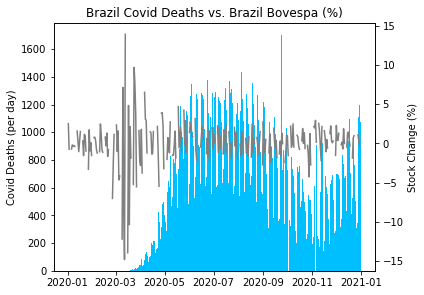

In [20]:
# Brazil Chart
title_brazil = 'Brazil Covid Deaths vs. Brazil Bovespa (%)'
color_brazil = 'deepskyblue'

def line_bar(deaths, stocks, color, title):
    # Plot the Covid deaths
    fig, ax = plt.subplots()
    ax.bar(date, deaths, width=1, color=color, label='Covid Deaths')
    plt.ylabel('Covid Deaths (per day)')      

    # Plot the Stock changes
    axes2 = plt.twinx()
    axes2.plot(date, stocks, color='gray', label='Stock Change (%)')
    axes2.set_ylabel('Stock Change (%)')

    fig.tight_layout()
    plt.xticks(rotation = 45)
    plt.title(title)
    return plt.show()

line_bar(brazil_covid_death, brazil_stock_list, color_brazil, title_brazil)

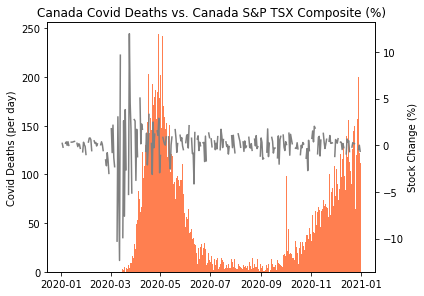

In [21]:
# Canada Chart
title_canada = 'Canada Covid Deaths vs. Canada S&P TSX Composite (%)'
color_canada = 'coral'

line_bar(canada_covid_death, canada_stock_list, color_canada, title_canada)

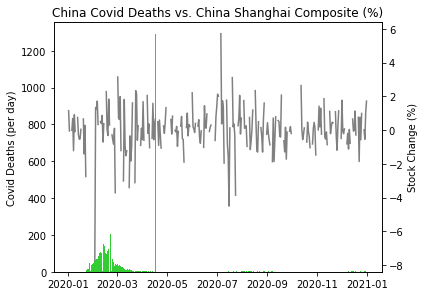

In [22]:
# China chart
title_china = 'China Covid Deaths vs. China Shanghai Composite (%)'
color_china = 'limegreen'

line_bar(china_covid_death, china_stock_list, color_china, title_china)

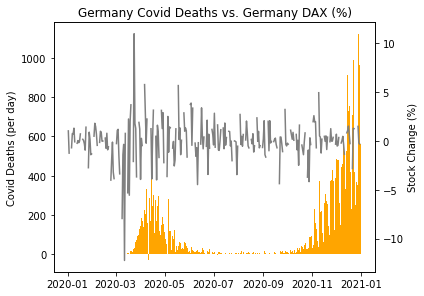

In [23]:
# Germany chart
title_germany = 'Germany Covid Deaths vs. Germany DAX (%)'
color_germany = 'orange'

line_bar(germany_covid_death, germany_stock_list, color_germany, title_germany)

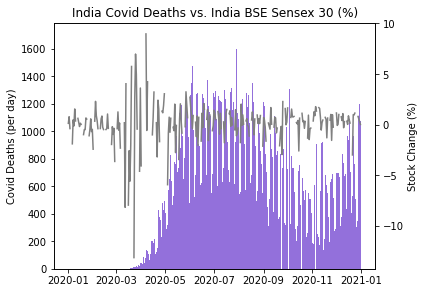

In [24]:
# India chart
title_india = 'India Covid Deaths vs. India BSE Sensex 30 (%)'
color_india = 'mediumpurple'

line_bar(india_covid_death, india_stock_list, color_india, title_india)

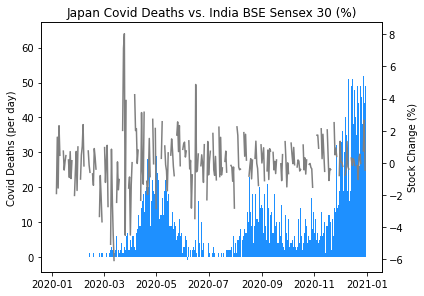

In [25]:
# Japan chart
title_japan = 'Japan Covid Deaths vs. India BSE Sensex 30 (%)'
color_japan = 'dodgerblue'

line_bar(japan_covid_death, japan_stock_list, color_japan, title_japan)

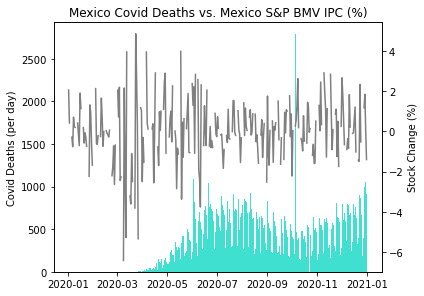

In [26]:
# Mexico chart
title_mexico = 'Mexico Covid Deaths vs. Mexico S&P BMV IPC (%)'
color_mexico = 'turquoise'

line_bar(mexico_covid_death, mexico_stock_list, color_mexico, title_mexico)

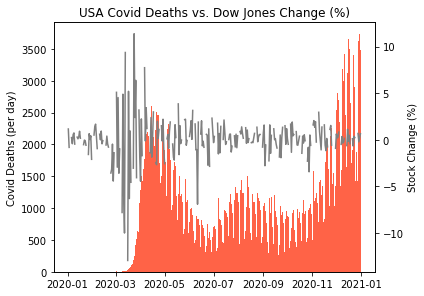

In [27]:
# USA chart
title_usa = 'USA Covid Deaths vs. Dow Jones Change (%)'
color_usa = 'tomato'

line_bar(usa_covid_death, usa_stock_list, color_usa, title_usa)

# Correlation and r-value

The r-value is: 0.00035966074621886647


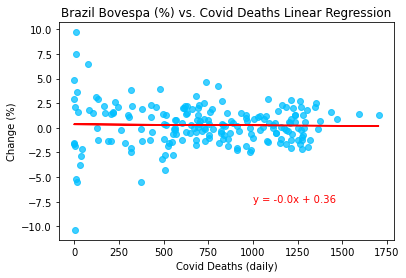

In [28]:
# Create labels for plot
title_brazil = "Brazil Bovespa (%) vs. Covid Deaths Linear Regression"

# Plot the location of the line equation
loc_brazil = (1000,-7.5)

# Create a function for plotting the scatter chart and linear regression
def linear_regress_stocks(stocks, deaths, title, color, anno_loc):
    
    # Account for the NaN values in the data sets for calculating lineregress
    mask = ~np.isnan(deaths) & ~np.isnan(stocks)
    
    #calculate linear regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(deaths[mask], stocks[mask])
    regress_values = deaths * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
       
    #Plot the data
    plt.scatter(deaths, stocks, alpha=.75, c=color)
    

   #Plot the linear regression
    plt.plot(deaths, regress_values, "r-")
    plt.annotate(line_eq, anno_loc, color='red')
    print(f"The r-value is: {rvalue**2}")

    plt.title(title)
    plt.xlabel('Covid Deaths (daily)')
    plt.ylabel('Change (%)')

    return plt.show()

linear_regress_stocks(brazil_stock_list, brazil_covid_death, title_brazil, color_brazil, loc_brazil)

The r-value is: 0.005098786960273166


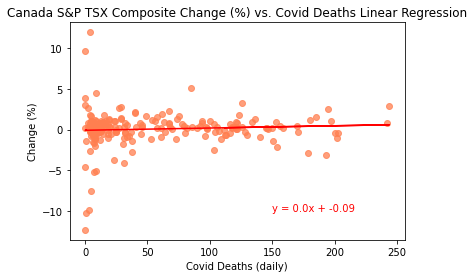

In [29]:
# Create Canada labels for plot
title_canada = "Canada S&P TSX Composite Change (%) vs. Covid Deaths Linear Regression"

# Plot the location of the line equation
loc_canada = (150,-10)

# Run the function
linear_regress_stocks(canada_stock_list, canada_covid_death, title_canada, color_canada, loc_canada)

The r-value is: 0.0005383641009590875


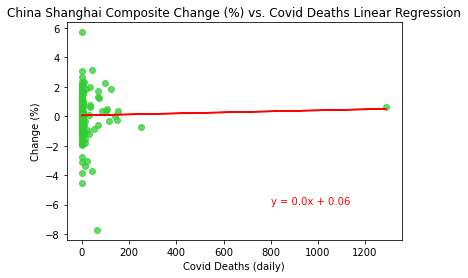

In [30]:
# Create China labels for plot
title_china = "China Shanghai Composite Change (%) vs. Covid Deaths Linear Regression"

# Plot the location of the line equation
loc_china = (800,-6)

# Run the function
linear_regress_stocks(china_stock_list, china_covid_death, title_china, color_china, loc_china)

The r-value is: 0.0012322242099360146


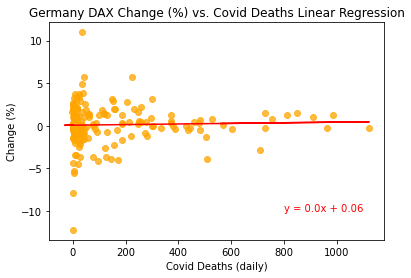

In [31]:
# Create Germany labels for plot
title_germany = "Germany DAX Change (%) vs. Covid Deaths Linear Regression"

# Plot the location of the line equation
loc_germany = (800,-10)

# Run the function
linear_regress_stocks(germany_stock_list, germany_covid_death, title_germany, color_germany, loc_germany)

The r-value is: 0.0009883102399751735


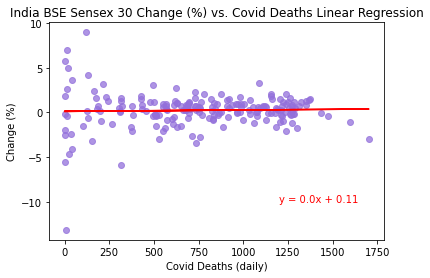

In [32]:
# Create India labels for plot
title_india = "India BSE Sensex 30 Change (%) vs. Covid Deaths Linear Regression"

# Plot the location of the line equation
loc_india = (1200,-10)

# Run the function
linear_regress_stocks(india_stock_list, india_covid_death, title_india, color_india, loc_india)

The r-value is: 0.0032807470378506767


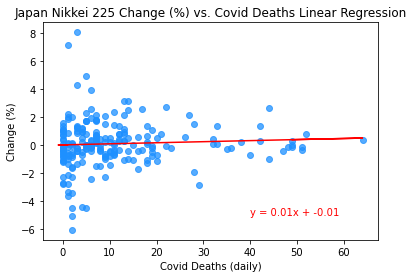

In [33]:
# Create Japan labels for plot
title_japan = "Japan Nikkei 225 Change (%) vs. Covid Deaths Linear Regression"

# Plot the location of the line equation
loc_japan = (40,-5)

# Run the function
linear_regress_stocks(japan_stock_list, japan_covid_death, title_japan, color_japan, loc_japan)

The r-value is: 0.00010191644819392451


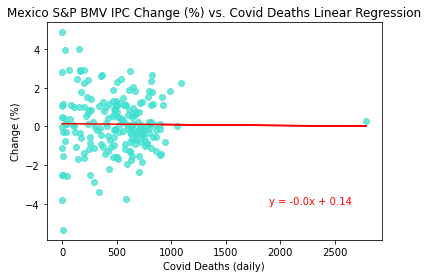

In [34]:
# Create Mexico labels for plot
title_mexico = "Mexico S&P BMV IPC Change (%) vs. Covid Deaths Linear Regression"

# Plot the location of the line equation
loc_mexico = (1900,-4)

# Run the function
linear_regress_stocks(mexico_stock_list, mexico_covid_death, title_mexico, color_mexico, loc_mexico)

The r-value is: 0.0030140720805549876


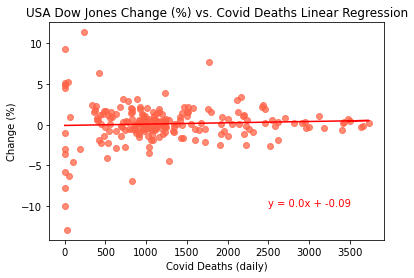

In [35]:
# Create USA labels for plot
title_usa = "USA Dow Jones Change (%) vs. Covid Deaths Linear Regression"

# Plot the location of the line equation
loc_usa = (2500,-10)

# Run the function
linear_regress_stocks(usa_stock_list, usa_covid_death, title_usa, color_usa, loc_usa)

# ANOVA for the stock data for 2020 and for 2010-2020

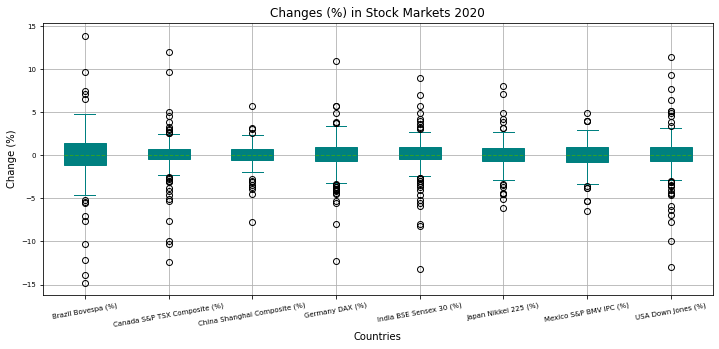

In [36]:
# Create a boxplot to compare 2020
stocks_2020_df.boxplot(column=['Brazil Bovespa (%)', 'Canada S&P TSX Composite (%)', 'China Shanghai Composite (%)', \
                                 'Germany DAX (%)', 'India BSE Sensex 30 (%)', 'Japan Nikkei 225 (%)', \
                                 'Mexico S&P BMV IPC (%)', 'USA Down Jones (%)'], \
                                 figsize=(12, 5), rot=10, fontsize=7,\
                                 patch_artist=True, color='teal', meanline=True, showmeans=True)
plt.title('Changes (%) in Stock Markets 2020')
plt.ylabel('Change (%)')
plt.xlabel('Countries')

       
plt.show()

In [37]:
# Create groups
group1 = stocks_2020_df["Brazil Bovespa (%)"].dropna()
group2 = stocks_2020_df["Canada S&P TSX Composite (%)"].dropna()
group3 = stocks_2020_df["China Shanghai Composite (%)"].dropna()
group4 = stocks_2020_df["Germany DAX (%)"].dropna()
group5 = stocks_2020_df["India BSE Sensex 30 (%)"].dropna()
group6 = stocks_2020_df["Japan Nikkei 225 (%)"].dropna()
group7 = stocks_2020_df["Mexico S&P BMV IPC (%)"].dropna()
group8 = stocks_2020_df["USA Down Jones (%)"].dropna()

In [38]:
# Run ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

# The pvalue indicates they are very similar data sets

F_onewayResult(statistic=0.028291061625711354, pvalue=0.9999755781591606)

Text(0.5, 0, 'Countries')

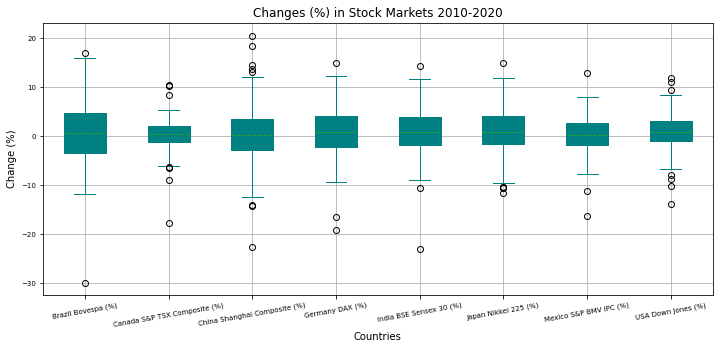

In [39]:
# Create a boxplot to compare 2010-2020 data
stocks_10yr_df.boxplot(column=['Brazil Bovespa (%)', 'Canada S&P TSX Composite (%)', 'China Shanghai Composite (%)', \
                                 'Germany DAX (%)', 'India BSE Sensex 30 (%)', 'Japan Nikkei 225 (%)', \
                                 'Mexico S&P BMV IPC (%)', 'USA Down Jones (%)'], \
                                 figsize=(12, 5), rot=10, fontsize=7,\
                                 patch_artist=True, color='teal', meanline=True, showmeans=True)
plt.title('Changes (%) in Stock Markets 2010-2020')
plt.ylabel('Change (%)')
plt.xlabel('Countries')

In [40]:
# Create groups
group1 = stocks_10yr_df["Brazil Bovespa (%)"]
group2 = stocks_10yr_df["Canada S&P TSX Composite (%)"]
group3 = stocks_10yr_df["China Shanghai Composite (%)"]
group4 = stocks_10yr_df["Germany DAX (%)"]
group5 = stocks_10yr_df["India BSE Sensex 30 (%)"]
group6 = stocks_10yr_df["Japan Nikkei 225 (%)"]
group7 = stocks_10yr_df["Mexico S&P BMV IPC (%)"]
group8 = stocks_10yr_df["USA Down Jones (%)"]

In [41]:
# Perform the ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

# The pvalue indicates they are very similar data sets

F_onewayResult(statistic=0.40599148795069967, pvalue=0.8989735855749987)

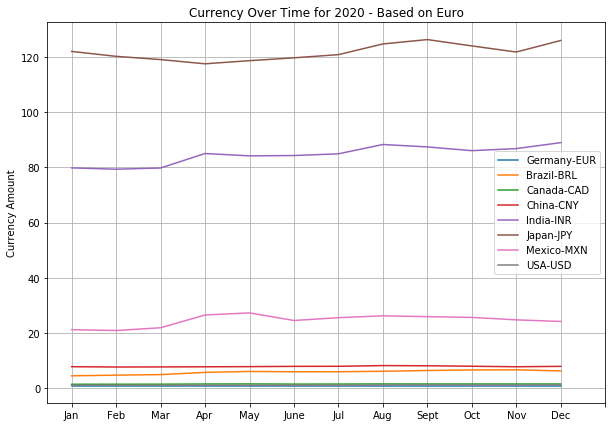

In [15]:
#chart for currency for 2020
xpositions=(0,1,2,3,4,5,6,7,8,9,10,11,12)
xlabels=("Jan","Feb","Mar","Apr","May","June", "Jul","Aug","Sept","Oct","Nov","Dec")
ax = currencyDF2020.plot(figsize = (10,7), title= "Currency Over Time for 2020 - Based on Euro")
plt.xticks(xpositions, xlabels)
ax.set_ylabel("Currency Amount")
plt.grid()
plt.show()

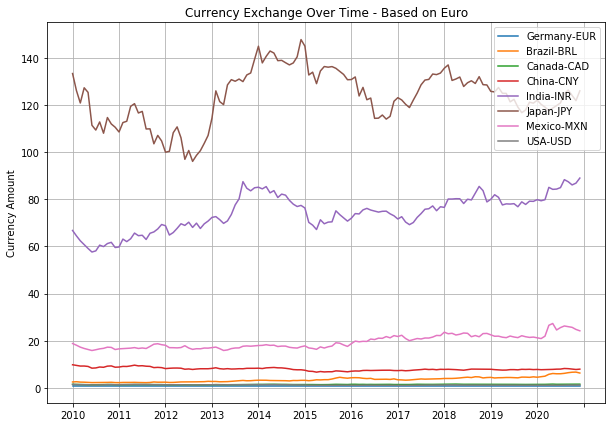

In [16]:
#chart for currency 2010-2020
positions=(0,12,24,36,48,60,72,84,96,108,120,132)
labels=("2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020")
ax2 = currencydf.plot(figsize = (10,7), title="Currency Exchange Over Time - Based on Euro",legend='best')
plt.xticks(positions, labels)
ax2.set_ylabel("Currency Amount")
plt.grid()
plt.show()
